In [ ]:
n you download the data from PubMed 200 RCT

In [ ]:
# prompt:
!wget -O data.zip https://ftp.ncbi.nlm.nih.gov/pub/pmc/oa/pubmed/200/pubmed200-oa.zip
!unzip data.zip

--2023-12-17 18:27:57--  https://ftp.ncbi.nlm.nih.gov/pub/pmc/oa/pubmed/200/pubmed200-oa.zip
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-12-17 18:27:58 ERROR 404: Not Found.

Archive:  data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


# Milestone Project NLP - SkimLit


## Get the data
- https://github.com/Franck-Dernoncourt/pubmed-rct

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 37.22 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os
os.listdir('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/')

['train.txt', 'dev.txt', 'test.txt']

## VISUALIZE VISUALIZE VISUALIZE

In [ ]:
file = open(data_dir+"train.txt", "r")
content = file.read(1000000)
print(content)

###24293578
OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
METHODS	A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .
METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
METHODS	Pain was assessed using the visual analog pain scale ( @-@ mm ) .
METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .
METHODS	Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP 

In [ ]:
def get_lines(filename):
  with open(filename,'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+'train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

###PRE_PROCESSING FUNCTION

In [ ]:
# def preprocess_text(filename):

#   input_lines = get_lines(filename)

#   abstract_lines = "" #create an empty abstract

#   abstract_samples = []

#   for line in input_lines:
#     if line.startswith("###"):
#       abstract_id = line
#       abstract_lines = ""
#     elif line.isspace():
#       abstract_line_split = abstract_lines.splitlines()


#       for abstract_line_number,abstract_line in enumerate(abstract_line_split):
#         line_data = {}
#         target_text_split = abstract_line.split("\t")
#         line_data["target"] = target_text_split[0]
#         line_data["text"] = target_text_split[1].lower()
#         line_data["line_number"] = abstract_line_number
#         line_data["total_lines"] = len(abstract_line_split) - 1
#         abstract_samples.append(line_data)


#       else:
#         abstract_lines += line


#   return abstract_samples
def preprocess_text(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
%%time
train_samples = preprocess_text(data_dir + 'train.txt')
val_samples = preprocess_text(data_dir + 'dev.txt')
test_samples = preprocess_text(data_dir + 'test.txt')

CPU times: user 390 ms, sys: 78 ms, total: 468 ms
Wall time: 467 ms


In [ ]:
len(val_samples)

30212

In [ ]:
len(train_samples)

180040

In [ ]:
train_samples[:20]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

### Dictionary to DataFrame for viz

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head(15)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

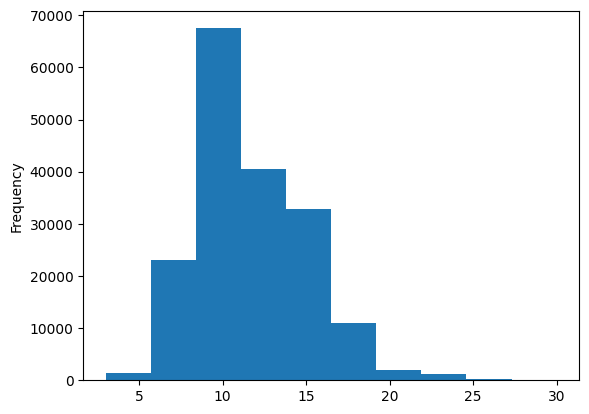

In [ ]:
train_df['total_lines'].plot.hist()

In [ ]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Convert data(text) and labels to numbers

In [ ]:
train_labels_one_hot=pd.get_dummies(train_df['target'])

In [ ]:
train_labels_one_hot=train_labels_one_hot.to_numpy()

In [ ]:
val_labels_one_hot=pd.get_dummies(val_df['target'])
val_labels_one_hot=val_labels_one_hot.to_numpy()

In [ ]:
test_labels_one_hot=pd.get_dummies(test_df['target'])
test_labels_one_hot=test_labels_one_hot.to_numpy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())

In [ ]:
train_labels_encoded,train_labels_one_hot

(array([3, 2, 2, ..., 4, 1, 1]),
 array([[0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0]], dtype=uint8))

In [ ]:
# train_df['target'].unique().tolist()

In [ ]:
class_names = label_encoder.classes_

In [ ]:
class_names[train_labels_encoded]

array(['OBJECTIVE', 'METHODS', 'METHODS', ..., 'RESULTS', 'CONCLUSIONS',
       'CONCLUSIONS'], dtype=object)

## Model 0: Multinomial NaiveBayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tfidf',TfidfVectorizer()),
                    ('clf',MultinomialNB())
])

In [ ]:
model_0.fit(train_sentences,train_labels_one_hot)

ValueError: ignored

In [ ]:
model_0.fit(train_sentences,train_labels_encoded)

In [ ]:
model_0.score(val_sentences,val_labels_encoded)

In [ ]:
baseline_predictions = model_0.predict(val_sentences)

In [ ]:
baseline_predictions

In [ ]:
val_labels_encoded

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
def calculate_results(y_true,y_pred):
    acc_score = accuracy_score(y_true,y_pred,)
    f1_scores = f1_score(y_true,y_pred,average='weighted')
    precision = precision_score(y_true,y_pred,average='weighted')
    recall = recall_score(y_true,y_pred,average='weighted')
    model_results = {'accuracy': acc_score,
                           'precision score':precision,
                           'recall score':recall,
                           'f1 score': f1_scores,
                    }
    return model_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels_encoded,y_pred=baseline_predictions)

In [ ]:
baseline_results

## Preparing data (TextVectorizer and Embeddings)

In [ ]:
train_df.head(5)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


### How long is each sentence on average

In [ ]:
# # How long is each sentence on average
# for sentence in train_df['text']:
#   print(sentence)
#   #length = len(sentence.split())
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
import numpy as np
lengths = []
for sentence in train_sentences:
  length = len(sentence.split())
  lengths.append(length)
avg_length=(np.mean(lengths))

In [ ]:
avg_length

26.338269273494777

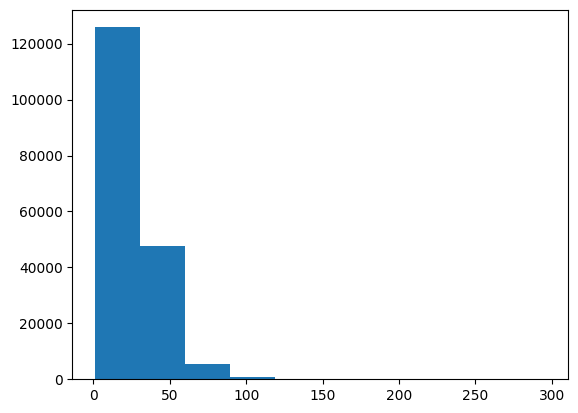

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths);

In [ ]:
percentile_95 = np.percentile(lengths, 95)

In [ ]:
output_max_length=int(percentile_95)
output_max_length

55

### Create textvectorizer layer

In [ ]:
# how many words are in our vocab?
max_tokens = 68000

In [ ]:
# create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # no. of words in vocab
                                    output_sequence_length = output_max_length # desired output
                                    )

### Why do we use .adapt(train_sentences)
- Once you call text_vectorizer.adapt(train_sentences), the text vectorizer learns the vocabulary and other parameters from the training data (train_sentences). After adaptation, you can use the same text vectorizer instance to convert other sentences into numerical vectors.

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
rand_sent = random.sample(train_sentences,1)

In [ ]:
rand_sent

['depletion of b lymphocytes is associated with suppression of inflammatory activity in multiple sclerosis .']

In [ ]:
for i in rand_sent:
    print(len(i.split()))

15


In [ ]:
text_vectorizer(rand_sent)

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[6108,    4,  186, 6080,   20,   81,    7, 1640,    4,  686,  190,
           5,  466, 2533,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
vocab = text_vectorizer.get_vocabulary()

In [ ]:
len(vocab)

64841

In [ ]:
vocab[:5]

['', '[UNK]', 'the', 'and', 'of']

In [ ]:
vocab[-5:]

['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']

In [ ]:
from tensorflow.keras import layers
token_embed = layers.Embedding(input_dim = len(vocab),
                             output_dim = 128,
                              mask_zero = True,
                             input_length= output_max_length #55
                            )
token_embed

In [ ]:
rand_sent

['depletion of b lymphocytes is associated with suppression of inflammatory activity in multiple sclerosis .']

In [ ]:
text_vectorizer(rand_sent)

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[6108,    4,  186, 6080,   20,   81,    7, 1640,    4,  686,  190,
           5,  466, 2533,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
token_embed(text_vectorizer(rand_sent))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[-0.01399561,  0.01416919,  0.0281255 , ..., -0.01440121,
          0.02642186, -0.01275523],
        [-0.02110474,  0.04911277,  0.04167506, ...,  0.01305095,
          0.02582408,  0.03938759],
        [-0.02827023,  0.02058553,  0.03068217, ..., -0.04589869,
         -0.01630811, -0.02542831],
        ...,
        [ 0.04445921,  0.00535232,  0.03288094, ...,  0.0370818 ,
          0.02472475, -0.04433044],
        [ 0.04445921,  0.00535232,  0.03288094, ...,  0.0370818 ,
          0.02472475, -0.04433044],
        [ 0.04445921,  0.00535232,  0.03288094, ...,  0.0370818 ,
          0.02472475, -0.04433044]]], dtype=float32)>

## Loading data as fast as possible (using prefetching and tf.data API)


### Use of tensor slices
- tf.data.Dataset.from_tensor_slices: This function is used to create a dataset from slices of tensors. It takes one or more tensors and creates a dataset where each element is a tuple formed by slicing the tensors along the first dimension.

In [ ]:
import tensorflow as tf
train_dataset =  tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
val_dataset =  tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset =  tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.uint8, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.uint8, name=None))>

## Model 1: Conv1D with embeddings

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
text_vectors = text_vectorizer(inputs)
embedding = token_embed(text_vectors)
x = layers.Conv1D(filters=64,kernel_size=5,padding = 'same',activation='relu')(embedding)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5,activation='softmax')(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                metrics='accuracy',
                optimizer='Adam')

In [ ]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 55, 128)           8299648   
                                                                 
 conv1d_3 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 5)                 325 

In [ ]:
history_model_1 = model_1.fit(train_dataset,
                              epochs=5,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              validation_data=val_dataset,
                              validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
562/562 [==============================] - 23s 32ms/step - loss: 0.8364 - accuracy: 0.6842 - val_loss: 0.5924 - val_accuracy: 0.7822
Epoch 2/5
562/562 [==============================] - 5s 9ms/step - loss: 0.5774 - accuracy: 0.7909 - val_loss: 0.5427 - val_accuracy: 0.7955
Epoch 3/5
562/562 [==============================] - 5s 9ms/step - loss: 0.5442 - accuracy: 0.8003 - val_loss: 0.5210 - val_accuracy: 0.8125
Epoch 4/5
562/562 [==============================] - 3s 6ms/step - loss: 0.5213 - accuracy: 0.8071 - val_loss: 0.5236 - val_accuracy: 0.8049
Epoch 5/5
562/562 [==============================] - 4s 7ms/step - loss: 0.5299 - accuracy: 0.8063 - val_loss: 0.5014 - val_accuracy: 0.8142


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.4938 - accuracy: 0.8194


[0.49378103017807007, 0.8193764090538025]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)

945/945 [==============================] - 2s 2ms/step


In [ ]:
model_1_pred_probs.shape

(30212, 5)

In [ ]:
model_1_pred_probs

array([[6.1188418e-01, 1.8676479e-01, 3.5829619e-03, 1.9006298e-01,
        7.7051152e-03],
       [4.0190318e-01, 5.0683194e-01, 3.4538845e-03, 6.6825137e-02,
        2.0985842e-02],
       [2.3788910e-01, 1.8487951e-02, 5.0763064e-03, 7.3822892e-01,
        3.1769773e-04],
       ...,
       [4.5414738e-04, 8.9558150e-04, 2.4776500e-02, 1.7085855e-04,
        9.7370285e-01],
       [1.3124597e-02, 5.9662116e-01, 3.3313703e-02, 5.3298669e-03,
        3.5161075e-01],
       [3.2476716e-02, 9.5951885e-01, 4.0107500e-03, 1.7333133e-03,
        2.2602775e-03]], dtype=float32)

In [ ]:
model_1_preds=tf.argmax(tf.round(model_1_pred_probs),axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

In [ ]:
class_names[model_1_preds]

array(['BACKGROUND', 'CONCLUSIONS', 'OBJECTIVE', ..., 'RESULTS',
       'CONCLUSIONS', 'CONCLUSIONS'], dtype=object)

In [ ]:
model_1_results = calculate_results(val_labels_encoded,model_1_preds)

In [ ]:
model_1_results

{'accuracy': 0.8067324242023037,
 'precision score': 0.827018669857127,
 'recall score': 0.8067324242023037,
 'f1 score': 0.8088800225254739}

In [ ]:
baseline_results

{'accuracy': 0.7218323844829869,
 'precision score': 0.7186466952323352,
 'recall score': 0.7218323844829869,
 'f1 score': 0.6989250353450294}

## Model 2: Tensorflow Hub Pre-trained Feature Extractor (token embeddings)

In [ ]:
import tensorflow_hub as hub
MODEL_URL = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")

In [ ]:
sentence_encoder_layer = hub.KerasLayer(MODEL_URL,
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="use")

In [ ]:
rand_sent

['depletion of b lymphocytes is associated with suppression of inflammatory activity in multiple sclerosis .']

In [ ]:
sentence_encoder_layer(rand_sent)

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 3.85676883e-02,  7.02879131e-02,  4.72187996e-02,
        -3.25871594e-02, -3.76496203e-02,  3.91934477e-02,
         1.43754343e-02, -5.38297892e-02,  4.77584936e-02,
         5.39876707e-02,  8.51974115e-02, -5.51938787e-02,
        -2.09903233e-02,  1.12644862e-03, -1.96292754e-02,
        -7.51031190e-02, -8.47698897e-02,  8.85490980e-03,
         4.70298678e-02, -1.35432305e-02, -7.47263655e-02,
        -4.55526374e-02, -4.12564687e-02, -4.49902080e-02,
         4.07054015e-02, -5.18405810e-02,  3.88354324e-02,
        -4.65655662e-02, -6.96704388e-02,  6.75669536e-02,
        -5.00861555e-02,  8.19755644e-02,  7.03712255e-02,
        -6.85536340e-02,  6.75060749e-02, -9.06219985e-03,
         2.94969939e-02,  5.06269559e-03,  6.43061334e-03,
        -4.50724643e-03, -1.51146331e-03,  7.80495862e-03,
         3.86175923e-02,  2.63754427e-02,  7.86892176e-02,
         3.24232085e-03, -7.57718980e-02, -6.40801340e-02,
      

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
model_6 = Sequential()
model_6.add(sentence_encoder_layer)
model_6.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
inputs = layers.Input(shape=[] ,dtype=tf.string)
x = sentence_encoder_layer(inputs)
x = layers.Dense(128,activation='relu')(x)
outputs = layers.Dense(5,activation='softmax')(x)
model_2 = tf.keras.Model(inputs,outputs)

In [ ]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None,)]                 0         
                                                                 
 use (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics='accuracy')

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.uint8, name=None))>

In [ ]:
history_3= model_2.fit(train_dataset,
            epochs=5,
            steps_per_epoch= int(0.1*len(train_dataset)),
            validation_data = val_dataset,
            validation_steps = int(0.1*len(val_dataset)))

Epoch 1/5
562/562 [==============================] - 13s 16ms/step - loss: 0.9176 - accuracy: 0.6485 - val_loss: 0.7959 - val_accuracy: 0.6875
Epoch 2/5
562/562 [==============================] - 10s 17ms/step - loss: 0.7684 - accuracy: 0.7031 - val_loss: 0.7537 - val_accuracy: 0.7064
Epoch 3/5
562/562 [==============================] - 6s 11ms/step - loss: 0.7502 - accuracy: 0.7122 - val_loss: 0.7353 - val_accuracy: 0.7171
Epoch 4/5
562/562 [==============================] - 8s 13ms/step - loss: 0.7158 - accuracy: 0.7240 - val_loss: 0.7079 - val_accuracy: 0.7311
Epoch 5/5
562/562 [==============================] - 7s 12ms/step - loss: 0.7224 - accuracy: 0.7203 - val_loss: 0.6874 - val_accuracy: 0.7364


In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 16s 17ms/step - loss: 0.6952 - accuracy: 0.7359


[0.6951858997344971, 0.7358665466308594]

In [ ]:
model_2_pred_probs=model_2.predict(val_dataset)

945/945 [==============================] - 16s 16ms/step


In [ ]:
model_2_pred_probs

array([[6.4338177e-01, 2.4004848e-01, 2.7183406e-03, 1.0405841e-01,
        9.7929714e-03],
       [5.0984538e-01, 3.9745831e-01, 6.9405194e-03, 8.3560117e-02,
        2.1956759e-03],
       [4.0640220e-01, 7.2600923e-02, 5.5528019e-02, 4.2618886e-01,
        3.9279956e-02],
       ...,
       [1.7009613e-03, 2.6112380e-03, 1.0818689e-01, 4.1414882e-04,
        8.8708675e-01],
       [2.6760884e-03, 2.0420905e-02, 4.9480596e-01, 8.3950110e-04,
        4.8125759e-01],
       [1.6703270e-01, 4.1301495e-01, 3.8352004e-01, 2.1366982e-03,
        3.4295622e-02]], dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs,axis=1)

In [ ]:
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 2, 1])>

In [ ]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [ ]:
model_2_results = calculate_results(val_labels_encoded,model_2_preds)

In [ ]:
model_2_results

{'accuracy': 0.7358665430954587,
 'precision score': 0.7325706007697348,
 'recall score': 0.7358665430954587,
 'f1 score': 0.7301540192818063}

In [ ]:
model_1_results

{'accuracy': 0.8067324242023037,
 'precision score': 0.827018669857127,
 'recall score': 0.8067324242023037,
 'f1 score': 0.8088800225254739}

In [ ]:
baseline_results

{'accuracy': 0.7218323844829869,
 'precision score': 0.7186466952323352,
 'recall score': 0.7218323844829869,
 'f1 score': 0.6989250353450294}

## Model 3: Conv1D with character embeddings
- normal embedding (each token gets embed into a feature vector)
i like tensorflow --> i->embedding,
                      like -> embedding,
                      tensorflow -> embedding

- character level embedding (each character/alphabet gets embed into a feature vector)        
i like tensorflow --> i --> embedding[....],
                      l --> embedding[....],
                      i --> embedding[....],
                      k --> embedding[....],
                      e --> embedding[....]

### Character-level tokenizer

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']